In [1]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt


In [2]:
### FIX BARMASSE
### FIX BARMA

In [3]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

## Looping through scraped data from 100X100trail

In [4]:
races = ['TOR330'
#         ,'TOR450'
        ]
years = [ #'2021',
#         '2022',
         '2023', 
#     '2024'
        ]

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50),

TOR330_2023 (42964, 10)
**************************************************


In [5]:
TORX_df_concat = pd.concat(TORX_df)

In [6]:

TOR330 = TORX_df_concat[TORX_df_concat['Year'] == year]
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2023 0  Colle Franco    2   M          IT  TOR330  2023       V1   
            1  Colle Franco    2   M          IT  TOR330  2023       V1   
            2  Colle Franco    2   M          IT  TOR330  2023       V1   
            3  Colle Franco    2   M          IT  TOR330  2023       V1   
            4  Colle Franco    2   M          IT  TOR330  2023       V1   

                                        Place                       Time  \
TOR330_2023 0                660 - FINISH 330  2023-09-13T04:39:16+02:00   
            1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00   
            2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00   
            3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00   
            4                620 - Bosses 330  2023-09-12T22:30:41+02:00   

               Status  
TOR330_2023 0    True  
            1    True  
            2    True  
            3    True  
            4    True

In [7]:
def counting_finish_DNF_dataset(df):
    for year in years :
        for race in races:

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()))
                
                
                
                # Finishers
                print('# of Finishers:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  True)].unique()))
                # DNFs
                print('# of DNFs:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  False)].unique()))
                print('*'*20)
            else:
                pass
            
counting_finish_DNF_dataset(TOR330)

TOR330 2023
# of Partipants: 1206
# of Finishers: 630
# of DNFs: 576
********************


In [8]:
def counting_groupby_dataset(df, column):
    for year in years :
        for race in races:
            
            df = df[['Name', 'Status', 'Year', 'Race']].drop_duplicates()

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()), '\n')
                
                print(df.groupby([column])[column].count())
                print('*'*20)
            else:
                pass
counting_groupby_dataset(df,  'Status')

TOR330 2023
# of Partipants: 1206 

Status
False    576
True     630
Name: Status, dtype: int64
********************


### DUV and ITRA data

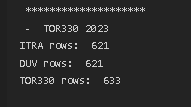


In [9]:
    TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                     dtype={'Start Date': 'string',
                                            'Year': 'string'})

    TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                     dtype={'Start Date': 'string',
                                           'Year': 'string'})

In [10]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            if len(df['Name'][(df['Year'] == year)]) != 0:

                print(race, year)
                print('# ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                                  (TORX_itra_no_DNF['Race'] == race)].shape[0])
                print('# DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                                  (TORX_duv_df['Race'] == race)].shape[0])

                print('# TOR330 rows: ', len(df['Name'][(df['Year'] == year) &
                                                 (df['Race'] == race) &
                                                 (df['Status'] == True)].unique()))
                print('\n', '*'*20)
                
                if year == '2022':
                    print(' - ','TOR330','2022')
                    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
                    print('\n', '*'*20)
            else: 
                pass
        
        



In [11]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 630
# of DNFs: 576
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  630

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    576
True     630
Name: Status, dtype: int64
********************


### Cleaning Place column

In [12]:
TOR330['Place'].unique()

array(['660 - FINISH 330', '650 - Monte de la Saxe 450',
       '640 - Pas Entre Deux Sauts 450', '630 - Rif. Frassati 450',
       '620 - Bosses 330', '610 - Ponteille Desot 450',
       '590 - Rif. Champillon 450', '581 - Ollomont OUT 330',
       '580 - Ollomont IN 330', '570 - Berio Damon 330',
       '565 - Col Brison 330', '551 - Oyace OUT 330',
       '550 - Oyace IN 330', '540 - Biv. R. Clermont 330',
       '530 - Rif. Cuney 330', '520 - Rif. Magià 330',
       '490 - Rif. Barmasse 330', '481 - Valtournenche OUT 330',
       '480 - Valtournenche IN 330', '470 - Rif. Grand Tournalin 330',
       '460 - Champoluc 330', '450 - Rif. Alpenzu 330',
       '381 - Gressoney OUT 330', '380 - Gressoney IN 330', '370 - Loo',
       '360 - Niel La Gruba 450', '350 - Col della Vecchia',
       '340 - Lago Chiaro', '330 - Rif. della Barma 450',
       '320 - Rif. Coda 450', '310 - Sassa', '300 - Perloz',
       '291 - Donnas OUT 450', '290 - Donnas IN 330', '260 - Pontboset',
       '250 - 

In [13]:
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)


TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Balma')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Niel - ','Niel ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Oyace IN','Oyace')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('  ',' ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Mont de la Saxe','Monte de la Saxe')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rifugio della Barmasse', 'Rifugio Barmasse')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Promoud','Bivacco Zappelli')


TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()

TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
TOR330['aid_stations'].unique()

C:\Users\Karina\AppData\Local\Temp\ipykernel_15652\3050462166.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Balma')
C:\Users\Karina\AppData\Local\Temp\ipykernel_15652\3050462166.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_15652\3050462166.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


array(['FINISH', 'Monte de la Saxe', 'Pas Entre Deux Sauts',
       'Rifugio Frassati', 'Bosses', 'Ponteille Desot',
       'Rifugio Champillon', 'Ollomont OUT', 'Ollomont IN', 'Berio Damon',
       'Col Brison', 'Oyace OUT', 'Oyace', 'Bivacco R. Clermont',
       'Rifugio Cuney', 'Rifugio Magià', 'Rifugio Barmasse',
       'Valtournenche OUT', 'Valtournenche IN', 'Rifugio Grand Tournalin',
       'Champoluc', 'Rifugio Alpenzu', 'Gressoney OUT', 'Gressoney IN',
       'Loo', 'Niel La Gruba', 'Col della Vecchia', 'Lago Chiaro',
       'Rifugio della Barma', 'Rifugio Coda', 'Sassa', 'Perloz',
       'Donnas OUT', 'Donnas IN', 'Pontboset', 'Chardonney',
       'Rifugio Dondena', 'Goilles', 'Cogne OUT', 'Cogne IN',
       'Rifugio Sella', 'Eaux Rousse', 'Rhemes-Notre-Dame', 'Chalet Epee',
       'Valgrisenche OUT', 'Valgrisenche IN', 'Planaval',
       'Bivacco Zappelli', 'Rifugio Deffeyes', 'La Thuile',
       'Baite Youlaz', 'START', 'PETTORALI', 'Parco Bollino',
       'Bruson Arp', 'Va

In [14]:
TOR330[TOR330['aid_stations'] == '']

,,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO


### Reading in TORX dates extracted from DUV

In [15]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

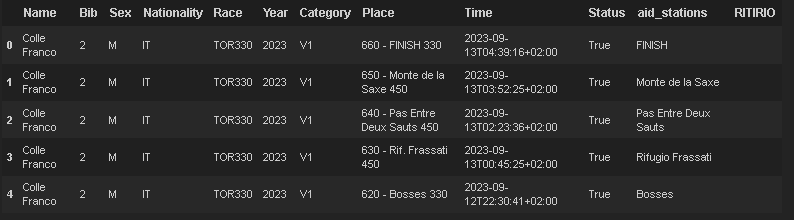

In [16]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2023 0  Colle Franco    2   M          IT  TOR330  2023       V1   
            1  Colle Franco    2   M          IT  TOR330  2023       V1   
            2  Colle Franco    2   M          IT  TOR330  2023       V1   
            3  Colle Franco    2   M          IT  TOR330  2023       V1   
            4  Colle Franco    2   M          IT  TOR330  2023       V1   

                                        Place                       Time  \
TOR330_2023 0                660 - FINISH 330  2023-09-13T04:39:16+02:00   
            1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00   
            2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00   
            3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00   
            4                620 - Bosses 330  2023-09-12T22:30:41+02:00   

               Status          aid_stations RITIRIO            new_Time  
TOR330_2023 0    True                FINISH         2023-09-13 04:39:16  
            1    True      Monte de la Saxe         2023-09-13 03:52:25  
            2    True  Pas Entre Deux Sauts         2023-09-13 02:23:36  
            3    True      Rifugio Frassati         2023-09-13 00:45:25  
            4    True                Bosses         2023-09-12 22:30:41

In [17]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 630
# of DNFs: 576
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  630

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    576
True     630
Name: Status, dtype: int64
********************


### PIVOTING the Dataset

In [18]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status'# , 'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()

pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,...,Rifugio Miserin,Rifugio Sella,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Vareton
0,Abe Takashi,443,M,JP,V1,TOR330,2023,True,2023-09-10 12:32:30,2023-09-15 12:13:32,...,NaT,2023-09-11 17:49:52,2023-09-13 03:14:01,NaT,2023-09-12 20:07:44,2023-09-10 22:29:16,2023-09-11 01:27:00,2023-09-14 11:20:43,2023-09-14 16:38:25,2023-09-14 19:55:33
1,Acerbi Luca,1290,M,IT,V3,TOR330,2023,False,2023-09-10 15:26:07,NaT,...,NaT,NaT,NaT,2023-09-10 11:22:44,NaT,2023-09-11 04:16:59,NaT,NaT,NaT,NaT
2,Acerbi Maria Luisa,1234,F,IT,SEN,TOR330,2023,False,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Adamczyk Guillaume,1215,M,BE,V2,TOR330,2023,False,2023-09-10 15:30:04,NaT,...,NaT,NaT,NaT,2023-09-10 11:50:58,NaT,2023-09-11 06:20:04,NaT,NaT,NaT,NaT
4,Affre Roxane,1320,F,FR,V2,TOR330,2023,False,2023-09-10 16:00:38,NaT,...,NaT,NaT,NaT,2023-09-10 11:19:55,NaT,2023-09-11 06:25:00,NaT,NaT,NaT,NaT


In [19]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 630
# of DNFs: 576
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  630

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    576
True     630
Name: Status, dtype: int64
********************


### RITIRIO
Issues with retired because there are both blanks and ' - Ritirio' for each person

In [20]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]

# Merge the datsets back after pivoting
pivoted_TOR330 = pivoted_TOR330.merge(
    ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
    on='Bib',
    how='left'
)

In [21]:
pivoted_TOR330.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Category', 'Race', 'Year',
       'Status', 'Baite Youlaz', 'Berio Damon', 'Bivacco R. Clermont',
       'Bivacco Zappelli', 'Bosses', 'Bruson Arp', 'Chalet Epee', 'Champoluc',
       'Chardonney', 'Cogne IN', 'Cogne OUT', 'Col Brison',
       'Col della Vecchia', 'Donnas IN', 'Donnas OUT', 'Eaux Rousse', 'FINISH',
       'Goilles', 'Gressoney IN', 'Gressoney OUT', 'La Thuile', 'Lago Chiaro',
       'Loo', 'Monte de la Saxe', 'Niel La Gruba', 'Ollomont IN',
       'Ollomont OUT', 'Oyace', 'Oyace OUT', 'PETTORALI', 'Parco Bollino',
       'Pas Entre Deux Sauts', 'Perloz', 'Planaval', 'Pontboset',
       'Ponteille Desot', 'Rhemes-Notre-Dame', 'Rifugio Alpenzu',
       'Rifugio Barmasse', 'Rifugio Champillon', 'Rifugio Coda',
       'Rifugio Cuney', 'Rifugio Deffeyes', 'Rifugio Dondena',
       'Rifugio Frassati', 'Rifugio Grand Tournalin', 'Rifugio Magià',
       'Rifugio Miserin', 'Rifugio Sella', 'Rifugio della Barma', 'START',
       'Sass

### Dealing with Anomalies

In [22]:
# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', 'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    # 'Bivacco Zappelli', 'Col Brison', 'Berio Damon' # Dropping these because its not very useful anyway!
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace', 'Bruson Arp',   'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,RITIRIO,START,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Abe Takashi,443,M,JP,2023,TOR330,V1,True,NaN,NaT,...,2023-09-15 10:26:55,2023-09-15 12:44:26,2023-09-15 15:41:40,2023-09-15 17:27:29,2023-09-15 19:31:31,2023-09-15 21:56:14,2023-09-16 02:00:21,2023-09-16 06:08:26,2023-09-16 08:39:35,2023-09-16 10:15:52
1,Acerbi Luca,1290,M,IT,2023,TOR330,V3,False,NaN,2023-09-10 11:22:44,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Acerbi Maria Luisa,1234,F,IT,2023,TOR330,SEN,False,NaN,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Adamczyk Guillaume,1215,M,BE,2023,TOR330,V2,False,NaN,2023-09-10 11:50:58,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Affre Roxane,1320,F,FR,2023,TOR330,V2,False,NaN,2023-09-10 11:19:55,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [23]:
# Looking for runners who have FINISHED< BUT have missing values for all last 3 checkpoints!
anomalies_df = pivoted_TOR330[(pivoted_TOR330['Status'] == True) &
               (pivoted_TOR330['Bosses'].isna()) &                
               (pivoted_TOR330['Rifugio Frassati'].isna()) & 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) &
               (pivoted_TOR330['Monte de la Saxe'].isna())]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status', 'RITIRIO', 'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH'
    
    
]].reset_index(drop = True)

### Conclusion: Easily visible that there are several other places that have missing values 

,Name,Bib,Year,Race,Status,RITIRIO,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Hartmuth Katharina,665,2023,TOR330,True,Donnas IN - RITIRO,2023-09-10 09:27:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-15 08:58:31
1,Houteer Magni Justine,275,2023,TOR330,True,Gressoney OUT - RITIRO,2023-09-10 09:20:29,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-16 14:12:20
2,Peron Bastien,540,2023,TOR330,True,NaN,2023-09-10 09:32:59,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-13 20:12:12
3,Smith Jonathan,1321,2023,TOR330,True,Donnas OUT - RITIRO,2023-09-10 11:23:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-15 13:59:51
4,Tang Yuen Ying,1105,2023,TOR330,True,NaN,2023-09-10 11:52:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-14 17:35:33
5,Verjee Sabrina,48,2023,TOR330,True,Donnas IN - RITIRO,2023-09-10 09:33:01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-13 05:38:22
6,Yang Victor,493,2023,TOR330,True,NaN,2023-09-10 09:49:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-14 00:08:44
7,Yoshida Shuhei,1143,2023,TOR330,True,NaN,2023-09-10 11:39:57,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-16 17:07:25


In [24]:
for name in anomalies_df['Name'].unique():  

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False

In [25]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 622
# of DNFs: 584
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  622

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    584
True     622
Name: Status, dtype: int64
********************


### Start Line Issues

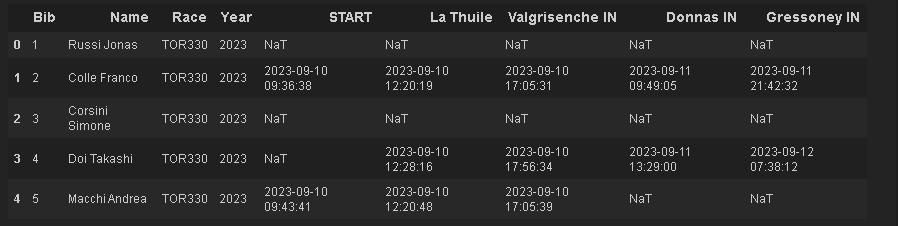

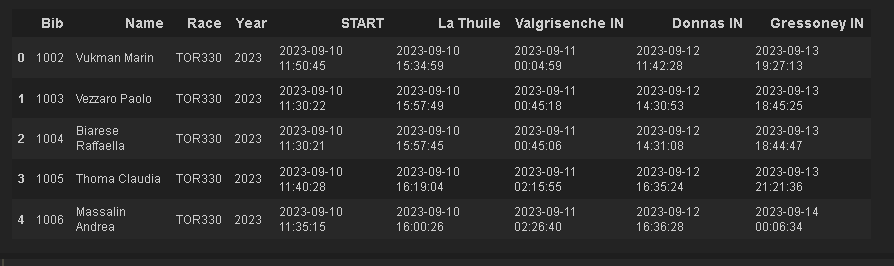

START times are all over the place and this is a MAJOR issue!

In [26]:
pivoted_TOR330[['Bib','Name', 'Race', 'Year',  'START', 'La Thuile', 'Valgrisenche IN', 'Donnas IN', 'Gressoney IN']].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,START,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Russi Jonas,TOR330,2023,NaT,NaT,NaT,NaT,NaT
1,2,Colle Franco,TOR330,2023,2023-09-10 09:36:38,2023-09-10 12:20:19,2023-09-10 17:05:31,2023-09-11 09:49:05,2023-09-11 21:42:32
2,3,Corsini Simone,TOR330,2023,NaT,NaT,NaT,NaT,NaT
3,4,Doi Takashi,TOR330,2023,NaT,2023-09-10 12:28:16,2023-09-10 17:56:34,2023-09-11 13:29:00,2023-09-12 07:38:12
4,5,Macchi Andrea,TOR330,2023,2023-09-10 09:43:41,2023-09-10 12:20:48,2023-09-10 17:05:39,NaT,NaT


In [27]:
pivoted_TOR330[['Bib','Name', 'Race', 'Year',  
                'START', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,START,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1002,Vukman Marin,TOR330,2023,2023-09-10 11:50:45,2023-09-10 15:34:59,2023-09-11 00:04:59,2023-09-12 11:42:28,2023-09-13 19:27:13
1,1003,Vezzaro Paolo,TOR330,2023,2023-09-10 11:30:22,2023-09-10 15:57:49,2023-09-11 00:45:18,2023-09-12 14:30:53,2023-09-13 18:45:25
2,1004,Biarese Raffaella,TOR330,2023,2023-09-10 11:30:21,2023-09-10 15:57:45,2023-09-11 00:45:06,2023-09-12 14:31:08,2023-09-13 18:44:47
3,1005,Thoma Claudia,TOR330,2023,2023-09-10 11:40:28,2023-09-10 16:19:04,2023-09-11 02:15:55,2023-09-12 16:35:24,2023-09-13 21:21:36
4,1006,Massalin Andrea,TOR330,2023,2023-09-10 11:35:15,2023-09-10 16:00:26,2023-09-11 02:26:40,2023-09-12 16:36:28,2023-09-14 00:06:34


### Adding dates into TOR330

In [28]:
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(1209, 59)
(1209, 60)


In [29]:
# Following the assumption that every bib prior to 1001 starts at 10:00:00
pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

# Following the assumption that every bib from 1001 onwards starts at 12:00:00
pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] <= 1001, 
        'Wave1', 
        'Wave2')



In [30]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']< 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Russi Jonas,TOR330,2023,2023-09-10 10:00:00,NaT,NaT,NaT,NaT
1,2,Colle Franco,TOR330,2023,2023-09-10 10:00:00,2023-09-10 12:20:19,2023-09-10 17:05:31,2023-09-11 09:49:05,2023-09-11 21:42:32
2,3,Corsini Simone,TOR330,2023,2023-09-10 10:00:00,NaT,NaT,NaT,NaT
3,4,Doi Takashi,TOR330,2023,2023-09-10 10:00:00,2023-09-10 12:28:16,2023-09-10 17:56:34,2023-09-11 13:29:00,2023-09-12 07:38:12
4,5,Macchi Andrea,TOR330,2023,2023-09-10 10:00:00,2023-09-10 12:20:48,2023-09-10 17:05:39,NaT,NaT


In [31]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1002,Vukman Marin,TOR330,2023,2023-09-10 12:00:00,2023-09-10 15:34:59,2023-09-11 00:04:59,2023-09-12 11:42:28,2023-09-13 19:27:13
1,1003,Vezzaro Paolo,TOR330,2023,2023-09-10 12:00:00,2023-09-10 15:57:49,2023-09-11 00:45:18,2023-09-12 14:30:53,2023-09-13 18:45:25
2,1004,Biarese Raffaella,TOR330,2023,2023-09-10 12:00:00,2023-09-10 15:57:45,2023-09-11 00:45:06,2023-09-12 14:31:08,2023-09-13 18:44:47
3,1005,Thoma Claudia,TOR330,2023,2023-09-10 12:00:00,2023-09-10 16:19:04,2023-09-11 02:15:55,2023-09-12 16:35:24,2023-09-13 21:21:36
4,1006,Massalin Andrea,TOR330,2023,2023-09-10 12:00:00,2023-09-10 16:00:26,2023-09-11 02:26:40,2023-09-12 16:36:28,2023-09-14 00:06:34


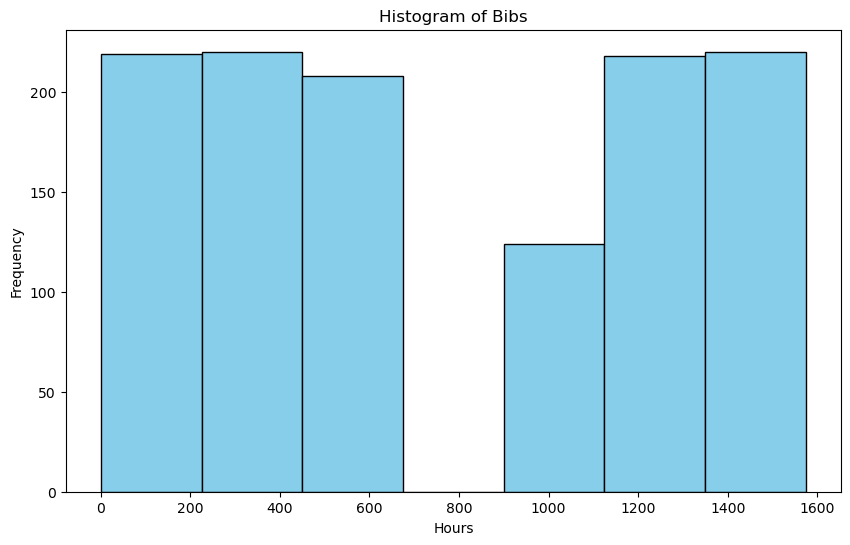

In [32]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=7, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

### Calculating Duration - THE MOST IMPORTANT!

In [33]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


In [34]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 
        'Category', 'Status','Wave', 'Duration', # MOVING DURATION CLOSER TO THE START SO I CAN SEE IT!
        'RITIRIO',
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
         'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 
         'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

### Checking accuracy of the Duration calculation

Because of issues with Start Date, it was thought that it would be a good idea to try and compare the DUV and ITRA duration time to establish accuracy of the calculation...

There are issues with the names, so some will be not be successfully merged.

In [35]:
# print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
# # print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# # Finished in 144:46:43 hours and 

In [36]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 622
# of DNFs: 584
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  622

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    584
True     622
Name: Status, dtype: int64
********************


### How many missing values are there for FINISHERS in each checkpoint

In [37]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[(pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()

# print(pivoted_TOR330_dates_noDNF.shape)
print('2023 - 622 FINISHERS - Missing Values')
for i in pivoted_TOR330_dates_noDNF.columns:
    missing_value_count =  pivoted_TOR330_dates_noDNF[i].isna().sum()
    
    if missing_value_count != 0:
        print(' ',i,missing_value_count)


2023 - 622 FINISHERS - Missing Values
  RITIRIO 621
  Baite Youlaz 1
  La Thuile 1
  Rifugio Deffeyes 1
  Valgrisenche OUT 1
  Chalet Epee 5
  Rhemes-Notre-Dame 2
  Rifugio Sella 148
  Cogne IN 3
  Cogne OUT 31
  Goilles 1
  Rifugio Dondena 7
  Pontboset 7
  Donnas IN 4
  Donnas OUT 9
  Perloz 2
  Sassa 5
  Rifugio della Barma 2
  Lago Chiaro 8
  Col della Vecchia 4
  Niel La Gruba 1
  Gressoney OUT 3
  Rifugio Alpenzu 1
  Champoluc 1
  Rifugio Grand Tournalin 4
  Valtournenche OUT 5
  Rifugio Barmasse 2
  Vareton 3
  Rifugio Magià 2
  Rifugio Cuney 2
  Bruson Arp 10
  Ollomont IN 5
  Ollomont OUT 16
  Rifugio Champillon 32
  Ponteille Desot 2
  Rifugio Frassati 1
  Pas Entre Deux Sauts 9
  Monte de la Saxe 2


In [38]:

### WHich wave is more likely to finish? 
### Wave 1 seems to have way more finishers - they do have a higher ITRA score, meaning that they are more
### experienced and stronger than Wave 2..
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     239
       True      409
Wave2  False     348
       True      213
Name: Status, dtype: int64

### DNFs 

In [39]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

pivoted_TOR330_dates_DNF.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
1,Acerbi Luca,1290,M,IT,2023,TOR330,V3,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Acerbi Maria Luisa,1234,F,IT,2023,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Adamczyk Guillaume,1215,M,BE,2023,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Affre Roxane,1320,F,FR,2023,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,Akimoto Kenji,1161,M,JP,2023,TOR330,V3,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [40]:
#### What missing values are there? 
### Some missing value is okay due to the fact that they DNFed so they wont have a timestamp
pivoted_TOR330_dates_DNF.isna().sum()

Name                      0
Bib                       0
Sex                       0
Nationality               0
Year                      0
                       ... 
Bosses                  582
Rifugio Frassati        587
Pas Entre Deux Sauts    587
Monte de la Saxe        587
FINISH                  587
Length: 61, dtype: int64

### What is the last place of DNFs?

In [41]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)


In [42]:
pivoted_TOR330_dates = pivoted_TOR330_dates[['Name', 'Bib',
                                                     'Sex', 'Nationality',
                                                     'Year', 'Race', 
                                                     'Category', 'Status', 'Wave', 'Duration', 
                                                     'RITIRIO', 'Retired', # putting retired at the from and not the back
                                                     'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
       'Bruson Arp',   'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

In [43]:
# creating a dataset to examine DNFs in the excel
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].drop(columns=['Sex', 'Nationality',
                                                          'Category', 'Status', 
                                                          'Wave', 'Duration'])    



# for year in years:
#     pivoted_TOR330_dates_DNF.to_excel(f'TOR330 Data/DNF/DNF_df_{year}.xlsx', index = False)


In [44]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].head(1)

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
1,Acerbi Luca,1290,M,IT,2023,TOR330,V3,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [45]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True].head(1)

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
225,Colle Franco,2,M,IT,2023,TOR330,V1,True,Wave1,2 days 18:39:16,...,NaT,2023-09-12 17:57:48,2023-09-12 17:57:55,2023-09-12 19:36:02,2023-09-12 21:04:38,2023-09-12 22:30:41,2023-09-13 00:45:25,2023-09-13 02:23:36,2023-09-13 03:52:25,2023-09-13 04:39:16


### Cleaning Last location

2023
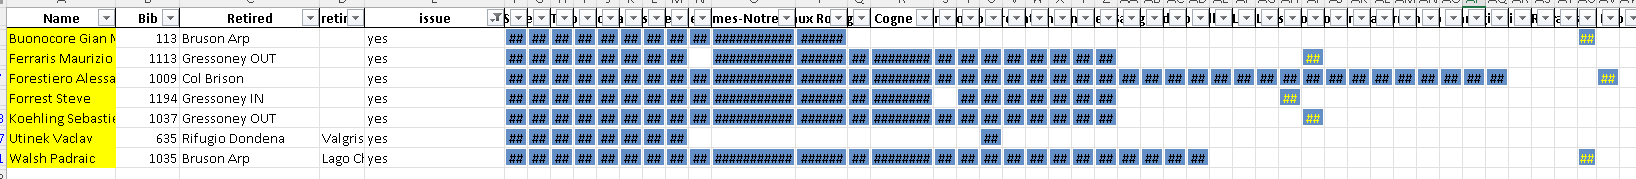

2024

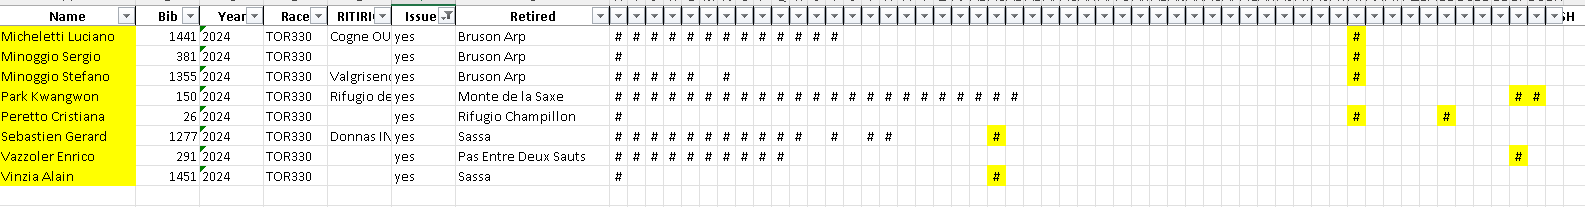


In [46]:
try:
    if year == '2023':

        names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                        'Ferraris Maurizio', 
    # 'Buonocore Gian Mario', 'Forestiero Alessandro', ## Have 2 timestamps of time travel
                                                         'Forrest Steve','Koehling Sebastien'
                                                        ]
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        print(retired_list)

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            retired_column = row['Retired']  # Get the column name in 'Retired'


            if retired_column in retired_list:
                pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

    elif year == '2024':
        names_that_DNFed_and_then_popped_up_miles_away =['Micheletti Luciano', 'Minoggio Sergio','Minoggio Stefano', 
                                                        'Park Kwangwon',  ## Has 2 time teleportation 
                                                        'Peretto Cristiana', ## Has 2 time teleportation 
                                                        'Sebastien Gerard', 'Vazzoler Enrico', 'Vinzia Alain']

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            # Get the column name in 'Retired'
            retired_column = row['Retired']

            retired_list = list(pivoted_TOR330_dates['Retired'][
                pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())

            if row['Name'] == 'Park Kwangwon':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Pas Entre Deux Sauts'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Monte de la Saxe'] = pd.NaT

            elif row['Name'] == 'Peretto Cristiana':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Rifugio Champillon'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Bruson Arp'] = pd.NaT

            else:

                if retired_column in retired_list:
                    pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        retired_list = ['Name', 'Bib'] + retired_list + ['Retired']
        print(retired_list)

     # Display the updated DataFrame
    pivoted_TOR330_dates[retired_list][pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

except:
    pass

['Gressoney OUT', 'Gressoney IN', 'Rifugio Dondena', 'Bruson Arp']
['Name', 'Bib', 'Gressoney OUT', 'Gressoney IN', 'Rifugio Dondena', 'Bruson Arp', 'Retired']


In [47]:
# Dropping the column retired otherwise it is going to think that RETIRED is the last column
pivoted_TOR330_dates = pivoted_TOR330_dates.drop(columns=['Retired'])    

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)

In [48]:
pivoted_TOR330_dates.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired
225,Colle Franco,2,M,IT,2023,TOR330,V1,True,Wave1,2 days 18:39:16,...,2023-09-12 17:57:48,2023-09-12 17:57:55,2023-09-12 19:36:02,2023-09-12 21:04:38,2023-09-12 22:30:41,2023-09-13 00:45:25,2023-09-13 02:23:36,2023-09-13 03:52:25,2023-09-13 04:39:16,NaN
938,Romain Olivier,662,M,FR,2023,TOR330,SEN,True,Wave1,2 days 21:49:38,...,2023-09-12 18:42:27,2023-09-12 19:18:53,2023-09-12 20:52:03,2023-09-12 22:37:52,2023-09-13 00:19:25,2023-09-13 03:29:59,2023-09-13 05:45:09,2023-09-13 07:13:28,2023-09-13 07:49:38,NaN
913,Reynolds Galen,6,M,CA,2023,TOR330,SEN,True,Wave1,2 days 23:22:30,...,2023-09-12 22:44:14,2023-09-12 23:12:37,2023-09-13 00:32:25,2023-09-13 01:52:21,2023-09-13 03:10:12,2023-09-13 05:36:50,2023-09-13 07:12:51,2023-09-13 08:41:42,2023-09-13 09:22:30,NaN
470,Hall Damian,20,M,GB,2023,TOR330,V1,True,Wave1,3 days 00:04:07,...,2023-09-12 22:44:22,2023-09-12 23:12:43,2023-09-13 00:36:43,2023-09-13 01:59:30,2023-09-13 03:33:35,2023-09-13 06:28:38,2023-09-13 08:03:24,2023-09-13 09:29:29,2023-09-13 10:04:07,NaN
400,Galeati Gianluca,647,M,IT,2023,TOR330,V1,True,Wave1,3 days 00:16:06,...,2023-09-12 22:42:45,2023-09-12 23:04:24,2023-09-13 00:39:06,2023-09-13 02:09:40,2023-09-13 03:58:37,2023-09-13 06:28:51,2023-09-13 08:04:05,2023-09-13 09:33:49,2023-09-13 10:16:06,NaN


#### Changing Status values to 'Finished' and DNF

In [49]:
pivoted_TOR330.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 0 to 1208
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Name                     1209 non-null   object        
 1   Bib                      1209 non-null   int64         
 2   Sex                      1209 non-null   object        
 3   Nationality              1209 non-null   object        
 4   Year                     1209 non-null   object        
 5   Race                     1209 non-null   object        
 6   Category                 1209 non-null   object        
 7   Status                   1209 non-null   bool          
 8   RITIRIO                  135 non-null    object        
 9   START                    1080 non-null   datetime64[ns]
 10  Baite Youlaz             1091 non-null   datetime64[ns]
 11  La Thuile                1089 non-null   datetime64[ns]
 12  Rifugio Deffeyes         1077 non-

In [50]:
pivoted_TOR330_dates['Status1'] = pivoted_TOR330_dates['Status'].astype('str')
# print(pivoted_TOR330_dates['Status1'].unique())

for year in years:
    if year == '2022':
        # Update 'Status1' for year 2022
        pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ] = pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ].str.replace('True', 'Finished')

        # For finishers at Bosses
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ].str.replace('False', 'Finished at Bosses')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        
        
        # All other DNFs
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ].str.replace('False', 'DNFs')
        
        
        
        
        
    else:
        
        print(year)
        # Update 'Status1' for years other than 2022
        pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1'] = (
            pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1']
            .str.replace('True', 'Finished')
            .str.replace('False', 'DNF')
        )
        print(pivoted_TOR330_dates['Status1'].unique())


2023
['Finished' 'DNF']


In [51]:
pivoted_TOR330_dates['Status1'].unique()

array(['Finished', 'DNF'], dtype=object)

In [52]:
counting_finish_DNF_dataset(pivoted_TOR330_dates)
find_out_the_rows_difference_between_datasets(pivoted_TOR330_dates)
pivoted_TOR330_dates.groupby('Status1')['Status1'].count()

TOR330 2023
# of Partipants: 1206
# of Finishers: 622
# of DNFs: 584
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  622

 ********************


Status1
DNF         587
Finished    622
Name: Status1, dtype: int64

In [53]:
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

### Where did the DNFs occur?

In [54]:
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' IN', '')
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' OUT', '')

In [55]:
section1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
             'Planaval', 'Valgrisenche']
section2 = [ 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne']

section3 = [ 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas']
section4  = ['Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney']

section5 = ['Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche'] 

section6 = [ 'Vareton', 'Rifugio Barmasse',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
            'Bruson Arp',   'Ollomont']
        
section7 = [ 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section1), 'Retired_Section'] = 'Section 1'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section2), 'Retired_Section'] = 'Section 2'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section3), 'Retired_Section'] = 'Section 3'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section4), 'Retired_Section'] = 'Section 4'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section5), 'Retired_Section'] = 'Section 5'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section6), 'Retired_Section'] = 'Section 6'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section7), 'Retired_Section'] = 'Section 7'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Section'] = 'DNS'


In [56]:


# finding the pre-post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 1' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 2' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 3' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 4' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 5' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 6' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 7' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Section'] = 'Pre Gressoney'


In [57]:
pivoted_TOR330_dates.groupby('Pre-Post Gressoney')['Pre-Post Gressoney'].count()

Pre-Post Gressoney
Post Gressoney     64
Pre Gressoney     407
Name: Pre-Post Gressoney, dtype: int64

In [58]:
pivoted_TOR330_dates.groupby('Retired_Section')['Retired_Section'].count()

Retired_Section
Pre Gressoney    116
Section 1         99
Section 2        128
Section 3         30
Section 4        150
Section 5         19
Section 6         37
Section 7          8
Name: Retired_Section, dtype: int64

In [59]:
counting_retired_section_and_wave = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].groupby(['Retired_Section', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_section_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_section_and_wave.index, 
                                            names=["Retired_Section", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_section_and_wave = counting_retired_section_and_wave.unstack(level="Wave")
counting_retired_section_and_wave.reset_index(drop =  False)
counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)


In [60]:
# counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)
counting_retired_section_and_wave['Total'] = counting_retired_section_and_wave['Wave1'] +counting_retired_section_and_wave['Wave2']

counting_retired_section_and_wave['Wave1_%'] = counting_retired_section_and_wave['Wave1']/counting_retired_section_and_wave['Total']
counting_retired_section_and_wave['Wave2_%'] = counting_retired_section_and_wave['Wave2']/counting_retired_section_and_wave['Total']

counting_retired_section_and_wave['Wave1_%'] = round(counting_retired_section_and_wave['Wave1_%']*100, 1)
counting_retired_section_and_wave['Wave2_%']= round(counting_retired_section_and_wave['Wave2_%']*100, 2)

counting_retired_section_and_wave

Wave,Wave1,Wave2,Total,Wave1_%,Wave2_%
Retired_Section,,,,,
Pre Gressoney,47,69,116,40.5,59.48
Section 1,36,63,99,36.4,63.64
Section 2,54,74,128,42.2,57.81
Section 3,18,12,30,60.0,40.00
Section 4,48,102,150,32.0,68.00
Section 5,12,7,19,63.2,36.84
Section 6,19,18,37,51.4,48.65
Section 7,5,3,8,62.5,37.50


In [61]:
# DNS
pivoted_TOR330_dates[pivoted_TOR330_dates['Retired'] == 'new_Start Date']

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Section,Pre-Post Gressoney
2,Acerbi Maria Luisa,1234,F,IT,2023,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
14,Amalbert Julien,1033,M,FR,2023,TOR330,V1,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
17,Amoroso Giovanni,649,M,IT,2023,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
22,Antonelli Luca,1326,M,IT,2023,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
25,Ardonfransman Jolande,1411,F,NL,2023,TOR330,V2,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,Villanueva Abrahan,246,M,CO,2023,TOR330,V1,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
1153,Vlatkovic Tatiana,1523,F,CH,2023,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
1160,Wakiya Takashi,1373,M,JP,2023,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN
1162,Ward Peter,661,M,US,2023,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,Pre Gressoney,NaN


In [62]:
pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration', 'RITIRIO', 
    'Retired', 'Retired_Section', # MOVING CLOSER TO THE FRONT
    'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
    'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
    'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
    'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
    'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
    'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
    'Bruson Arp',   'Ollomont IN',
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
    'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
    'FINISH']]

### Calculating the Times for each section

In [63]:
pivoted_TOR330_dates['Section 1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']
pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section 2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section 3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section 4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section 5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section 6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section 7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

### Converting to seconds for Tableau Analysis

In [64]:
pivoted_TOR330_dates.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Duration', 'RITIRIO', 'Retired',
       'Retired_Section', 'new_Start Date', 'Baite Youlaz', 'La Thuile',
       'Rifugio Deffeyes', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
       'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
       'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
       'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
       'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
       'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
       'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
       'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
       'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
       'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio 

In [65]:
for column in ['Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas',
                'Section 4 Time', 'Time Spent in Gressoney',
                'Section 5 Time', 'Time Spent in Valtournenche',
                'Section 6 Time', 'Time Spent in Ollomont',
                'Section 7 Time',  'Duration']:
    # Convert the Duration columns to seconds
    pivoted_TOR330_dates[f'{column}_in_seconds'] = pd.to_timedelta(pivoted_TOR330_dates[column]).dt.total_seconds()

In [66]:
for column in [ 'Duration',
                'Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas', 
                'Section 4 Time', 'Time Spent in Gressoney', 
                'Section 5 Time', 'Time Spent in Valtournenche', 
                'Section 6 Time', 'Time Spent in Ollomont', 
                'Section 7 Time']:
    # Convert the Duration columns to seconds
    pivoted_TOR330_dates[column] = pivoted_TOR330_dates[column].astype('str')

In [67]:
pivoted_TOR330_dates.groupby('Retired')['Retired'].size()

Retired
Baite Youlaz                 2
Bosses                       5
Bruson Arp                   5
Chalet Epee                  6
Champoluc                   10
Chardonney                   3
Cogne                       31
Col della Vecchia           13
Donnas                      20
Eaux Rousse                 51
Goilles                      2
Gressoney                   58
La Thuile                   13
Lago Chiaro                  9
Loo                          4
Niel La Gruba               28
Ollomont                     7
Oyace                       11
Perloz                       9
Planaval                     9
Pontboset                    1
Ponteille Desot              3
Rhemes-Notre-Dame           32
Rifugio Barmasse             1
Rifugio Coda                 6
Rifugio Cuney                1
Rifugio Deffeyes            15
Rifugio Dondena              4
Rifugio Grand Tournalin      1
Rifugio Magià               10
Rifugio Sella                8
Rifugio della Barma         16


In [68]:
pivoted_TOR330_dates.groupby(['Retired_Section'])['Retired_Section'].size()

Retired_Section
Pre Gressoney    116
Section 1         99
Section 2        128
Section 3         30
Section 4        150
Section 5         19
Section 6         37
Section 7          8
Name: Retired_Section, dtype: int64

In [69]:
pivoted_TOR330_dates['Retired_Section'].unique()

array([nan, 'Section 1', 'Pre Gressoney', 'Section 4', 'Section 2',
       'Section 6', 'Section 3', 'Section 5', 'Section 7'], dtype=object)

### Saving for Tableau

In [70]:
pivoted_TOR330_dates.to_excel(f'{race} Data/clean_{race}_aid_stations_{year}.xlsx' )

In [71]:
year

'2023'